<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Computer_Vision/blob/main/Image_Parking_Car_Count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow

In [130]:
# detection으로 인정할 최소 신뢰도 지정
min_confidence = 0.4

# 원본 이미지
file_nm = 'car2.jpg'
file_name = '/content/gdrive/MyDrive/CV/Parking Car Count/image/' + file_nm

# Yolo File Path
yolov3_weights = '/content/gdrive/MyDrive/CV/Object Detection_YOLO/yolov3.weights'
yolov3_cfg = '/content/gdrive/MyDrive/CV/Object Detection_YOLO/yolov3.cfg'
coco_names = '/content/gdrive/MyDrive/CV/Object Detection_YOLO/coco.names'

# Load Yolo
net = cv2.dnn.readNet(yolov3_weights, yolov3_cfg)

# detection 할 Object list 정의
classes = []

In [131]:
# 80개 Object를 구분할 수 있는 Object의 이름을 classes 배열에 넣기
with open(coco_names, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [132]:
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [133]:
layer_names = net.getLayerNames()

In [134]:
print(layer_names)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [135]:
len(layer_names)

254

In [136]:
output_layers = net.getUnconnectedOutLayers()

In [137]:
output_layers

array([200, 227, 254], dtype=int32)

In [138]:
# output_layer 를 왜 이렇게 하는지? > tuple index out of range
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [139]:
# Loading Image
start_time = time.time()
img = cv2.imread(file_name)
height, width, channels = img.shape

In [140]:
# Detecting Objects
# YOLOv3의 Detecting model 3가지(320x320, 416x416, 608x608)
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

In [141]:
net.setInput(blob)

In [142]:
outs = net.forward(output_layers)

In [143]:
# Showing informations on the screen
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)    # detection 한 Class id
        confidence = scores[class_id]   # detection 한 Class의 신뢰도

        # Filter only 'car'
        if class_id == 2 and confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])              # boxing 정보를 boxes 배열에 저장
            confidences.append(float(confidence))   # 신뢰도를 confidences 배열에 저장

Min Confidence : 0.4
2 99.91%
3 99.93%
5 99.91%
6 99.96%
9 49.20%
= = = process time 5.432 seconds


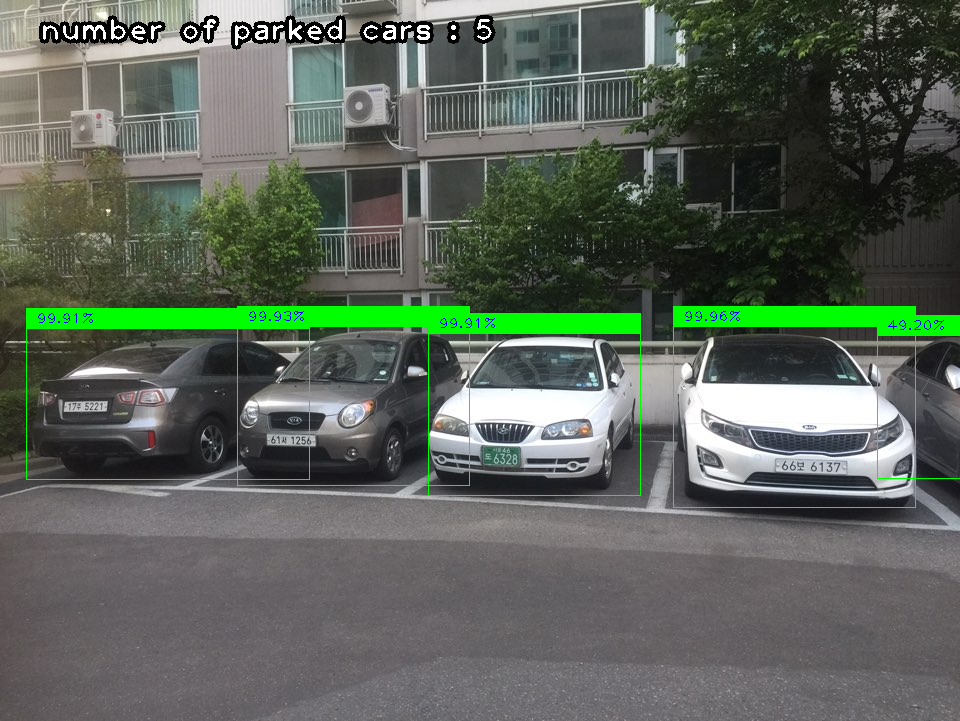

In [144]:
# apply non-max suppression
# 박스안에 노이즈를 하나로 만들기
indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)

print(f'Min Confidence : {min_confidence}')
for i in range(len(boxes)):
    if i in indexes:    # 노이즈가 제거된 박스만 표시
        x, y, w, h = boxes[i]
        label = f'{confidences[i]:,.2%}'    # 신뢰도(확률)
        print(i, label)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
        cv2.rectangle(img, (x, y - 20), (x + w, y), (0, 255, 0), -1)
        cv2.putText(img, label, (x + 10, y - 5), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1)

text = f'number of parked cars : {len(indexes)}'
cv2.putText(img, text, (40, 40), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 0), 10)
cv2.putText(img, text, (40, 40), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 2)

process_time = time.time() - start_time
print(f'= = = process time {process_time:.3f} seconds')

cv2_imshow(img)